In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

sns.set(rc = {"figure.figsize":(16, 9)})

In [14]:
data_1 = np.loadtxt( "nodes.txt")
#data_2 = np.loadtxt( "inf/test_1_5_25.txt")

In [15]:
t        = data_1[:, 0]
x        = data_1[:, 1]
y        = data_1[:, 2]
u        = data_1[:, 3]
real_u   = data_1[:, 4]

In [16]:
t

array([0., 0., 0., ..., 1., 1., 1.])

C:\Users\Елизавета\AppData\Local\Temp\ipykernel_11300\47349619.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(d_x, d_y, u[(time_n - 1) * k : time_n * k].reshape((Nx, Nx)), cmap='viridis', label="Численное решение"),


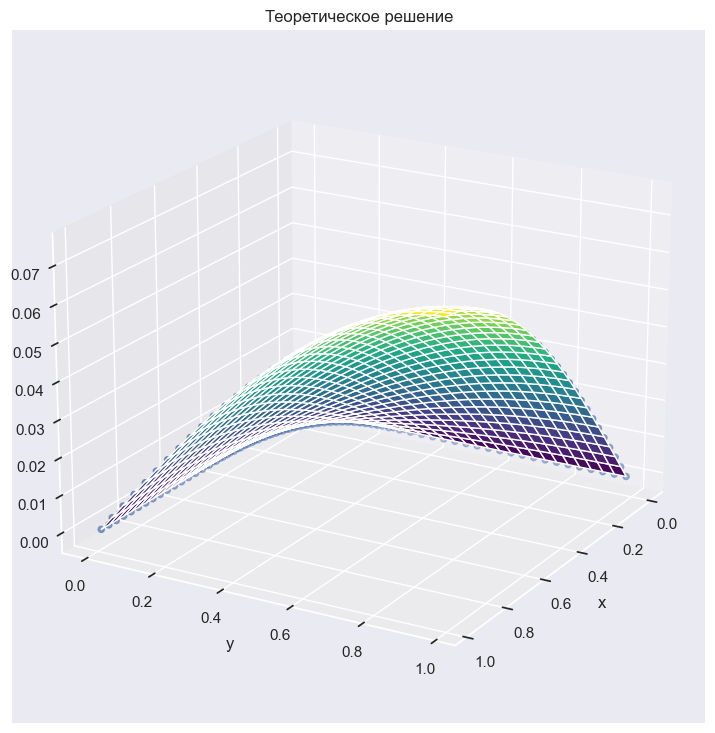

<Figure size 1600x900 with 0 Axes>

In [17]:
time_n = 50
Nx = 30
k = Nx*Nx
Nt = 200

i_t        = t       [(time_n - 1) * k: time_n * k]  
i_x        = x       [(time_n - 1) * k: time_n * k]  
i_y        = y       [(time_n - 1) * k: time_n * k]  
i_u        = u       [(time_n - 1) * k: time_n * k]  
i_real_u   = real_u  [(time_n - 1) * k: time_n * k]  


d_x, d_y = i_x[:Nx], i_x[:Nx]
d_x, d_y = np.meshgrid(d_x, d_y)
d_u = i_u.reshape((int(np.sqrt(len(i_u))), int(np.sqrt(len(i_u)))))

# Строим поверхность
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(d_x, d_y, real_u[(time_n - 1) * k : time_n * k].reshape((Nx, Nx)), cmap='viridis', label="Точное решение")
ax.scatter(d_x, d_y, u[(time_n - 1) * k : time_n * k].reshape((Nx, Nx)), cmap='viridis', label="Численное решение"),

# Настройки осей и меток
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Теоретическое решение")
ax.view_init(20, 30)
# Отображаем график
plt.show()
plt.savefig("TeorSolPict.pdf")

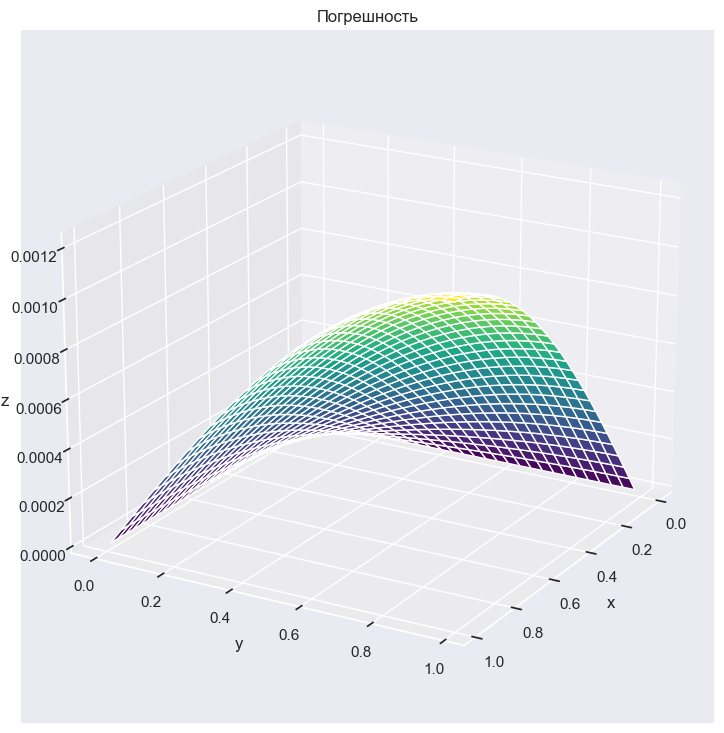

<Figure size 1600x900 with 0 Axes>

In [18]:
i_t        = t       [(time_n - 1) * k: time_n * k]  
i_x        = x       [(time_n - 1) * k: time_n * k]  
i_y        = y       [(time_n - 1) * k: time_n * k]  
i_u        = u       [(time_n - 1) * k: time_n * k]  
i_real_u   = real_u  [(time_n - 1) * k: time_n * k]  


d_x, d_y = i_x[:Nx], i_x[:Nx]
d_x, d_y = np.meshgrid(d_x, d_y)
d_u = i_u.reshape((int(np.sqrt(len(i_u))), int(np.sqrt(len(i_u)))))

# Строим поверхность
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(d_x, d_y, real_u[(time_n - 1) * k : time_n * k].reshape((Nx, Nx)) - u[(time_n - 1) * k : time_n * k].reshape((Nx, Nx)), cmap='viridis', label="Погрешность")

# Настройки осей и меток
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Погрешность")
ax.view_init(20, 30)
# Отображаем график
plt.show()
plt.savefig("TeorSolPict.pdf")

In [19]:
from matplotlib import cm
from tqdm import tqdm
from matplotlib.animation import ArtistAnimation

sns.set_theme(style="darkgrid")

def create_gif_solution(interval):

    fig = plt.figure()
    plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(projection="3d")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')

    x, y = i_x[:Nx], i_x[:Nx]
    d_x, d_y = np.meshgrid(x, y)
    frames = []
    for time_n in tqdm(range(1, Nt)):
        frames.append([ax.plot_surface(d_x, d_y, real_u[(time_n - 1) * k : time_n * k].reshape((Nx, Nx)), cmap='viridis', label="Аналитическое решение"),
                       ax.scatter(d_x, d_y, u[(time_n - 1) * k : time_n * k].reshape((Nx, Nx)), cmap='viridis', color="red")])
        
    animation = ArtistAnimation(
    fig,                # фигура, где отображается анимация
    frames,              # кадры
    interval=interval,        # задержка между кадрами в мс
    blit=True,          # использовать ли двойную буферизацию
    repeat=True)       # зацикливать ли анимацию
    animation.save('real_u_vs_u.gif')

  0%|          | 0/199 [00:00<?, ?it/s]C:\Users\Елизавета\AppData\Local\Temp\ipykernel_11300\1520642677.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(d_x, d_y, u[(time_n - 1) * k : time_n * k].reshape((Nx, Nx)), cmap='viridis', color="red")])
100%|██████████| 199/199 [00:01<00:00, 105.51it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


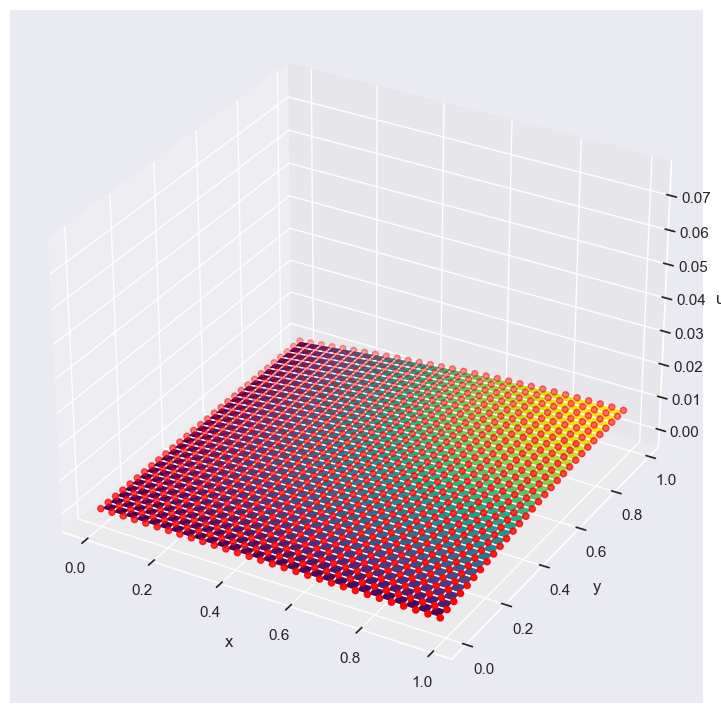

<Figure size 1000x1000 with 0 Axes>

In [20]:
create_gif_solution(20)

In [21]:
from matplotlib import cm
from tqdm import tqdm
from matplotlib.animation import ArtistAnimation

sns.set_theme(style="darkgrid")

def create_gif_error(interval):

    fig = plt.figure()
    plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(projection="3d")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')

    x, y = i_x[:Nx], i_x[:Nx]
    d_x, d_y = np.meshgrid(x, y)
    frames = []
    for time_n in tqdm(range(1, Nt)):
        frames.append([ax.plot_surface(d_x, d_y, u[(time_n - 1) * k : time_n * k].reshape((Nx, Nx)) - real_u[(time_n - 1) * k : time_n * k].reshape((Nx, Nx)), cmap='viridis', label="Погрешность")])
        
    animation = ArtistAnimation(
    fig,                 # фигура, где отображается анимация
    frames,              # кадры
    interval=interval,   # задержка между кадрами в мс
    blit=True,           # использовать ли двойную буферизацию
    repeat=True)         # зацикливать ли анимацию
    animation.save('error.gif')

100%|██████████| 199/199 [00:01<00:00, 157.41it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


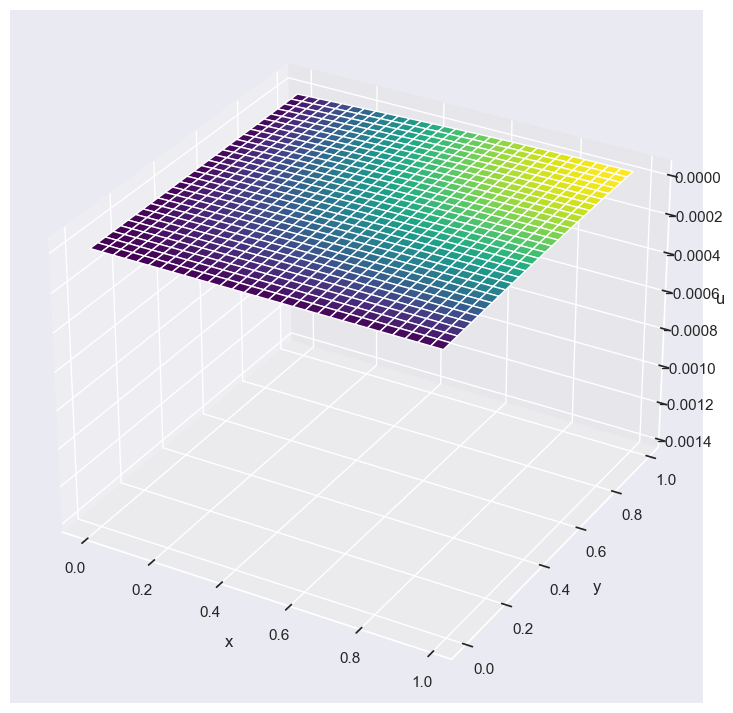

<Figure size 1000x1000 with 0 Axes>

In [22]:
create_gif_error(20)

In [ ]:
from matplotlib import cm
from tqdm import tqdm
from matplotlib.animation import ArtistAnimation

sns.set_theme(style="darkgrid")

def create_gif_solution(interval):

    fig = plt.figure()
    plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(projection="3d")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')

    x, y = i_x[:Nx], i_x[:Nx]
    d_x, d_y = np.meshgrid(x, y)
    frames = []
    for time_n in tqdm(range(1, Nt)):
        frames.append([ax.plot_surface(d_x, d_y, u[(time_n - 1) * k : time_n * k].reshape((Nx, Nx)), cmap='viridis', label="Численное решение")])

    animation = ArtistAnimation(
    fig,                 # фигура, где отображается анимация
    frames,              # кадры
    interval=interval,   # задержка между кадрами в мс
    blit=True,           # использовать ли двойную буферизацию
    repeat=True)         # зацикливать ли анимацию
    animation.save('u.gif')

100%|██████████| 199/199 [00:01<00:00, 163.40it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


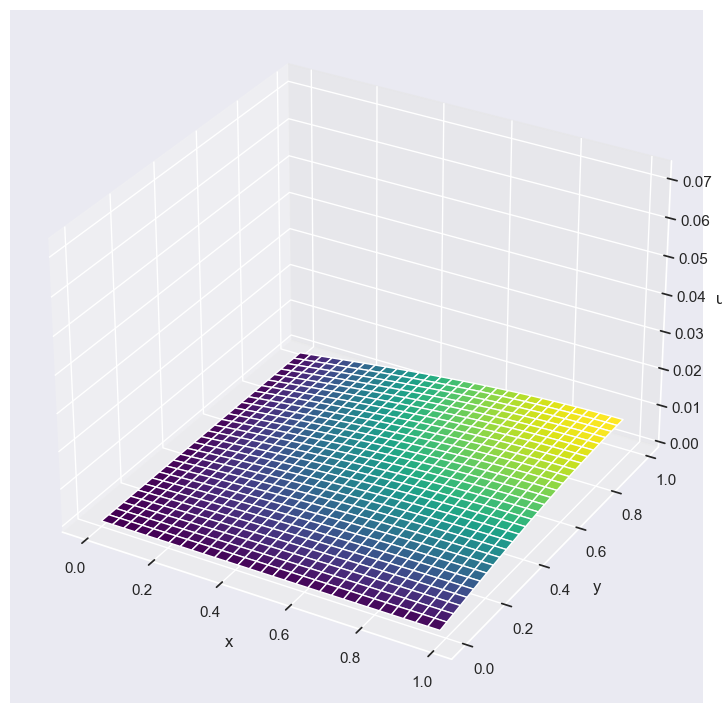

<Figure size 1000x1000 with 0 Axes>

In [24]:
create_gif_solution(20)